In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = 'F9JWpzy2KzrfvA7kRzm4'

In [3]:
intc = quandl.get('WIKI/INTC',start_date='2013-1-1')

In [4]:
intc.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,51.55,52.17,51.17,51.56,22984769.0,0.0,1.0,51.55,52.17,51.17,51.56,22984769.0
2018-03-22,50.74,51.96,50.60,50.83,30650151.0,0.0,1.0,50.74,51.96,50.60,50.83,30650151.0
2018-03-23,50.59,50.99,49.36,49.36,36741700.0,0.0,1.0,50.59,50.99,49.36,49.36,36741700.0
2018-03-26,50.74,52.49,50.32,52.48,37527480.0,0.0,1.0,50.74,52.49,50.32,52.48,37527480.0
2018-03-27,53.01,53.25,50.78,51.19,37076576.0,0.0,1.0,53.01,53.25,50.78,51.19,37076576.0


In [5]:
nvda = quandl.get('WIKI/NVDA',start_date='2013-1-1')

In [6]:
nvda.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,249.32,252.00,247.330,248.56,10841782.0,0.0,1.0,249.32,252.00,247.330,248.56,10841782.0
2018-03-22,246.00,247.88,240.341,241.85,13663927.0,0.0,1.0,246.00,247.88,240.341,241.85,13663927.0
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0.0,1.0,242.40,242.67,232.520,232.97,18225390.0
2018-03-26,238.00,244.53,235.900,244.48,15130542.0,0.0,1.0,238.00,244.53,235.900,244.48,15130542.0
2018-03-27,247.75,250.00,219.845,225.52,34462113.0,0.0,1.0,247.75,250.00,219.845,225.52,34462113.0


Text(0,0.5,'Price/Share ($)')

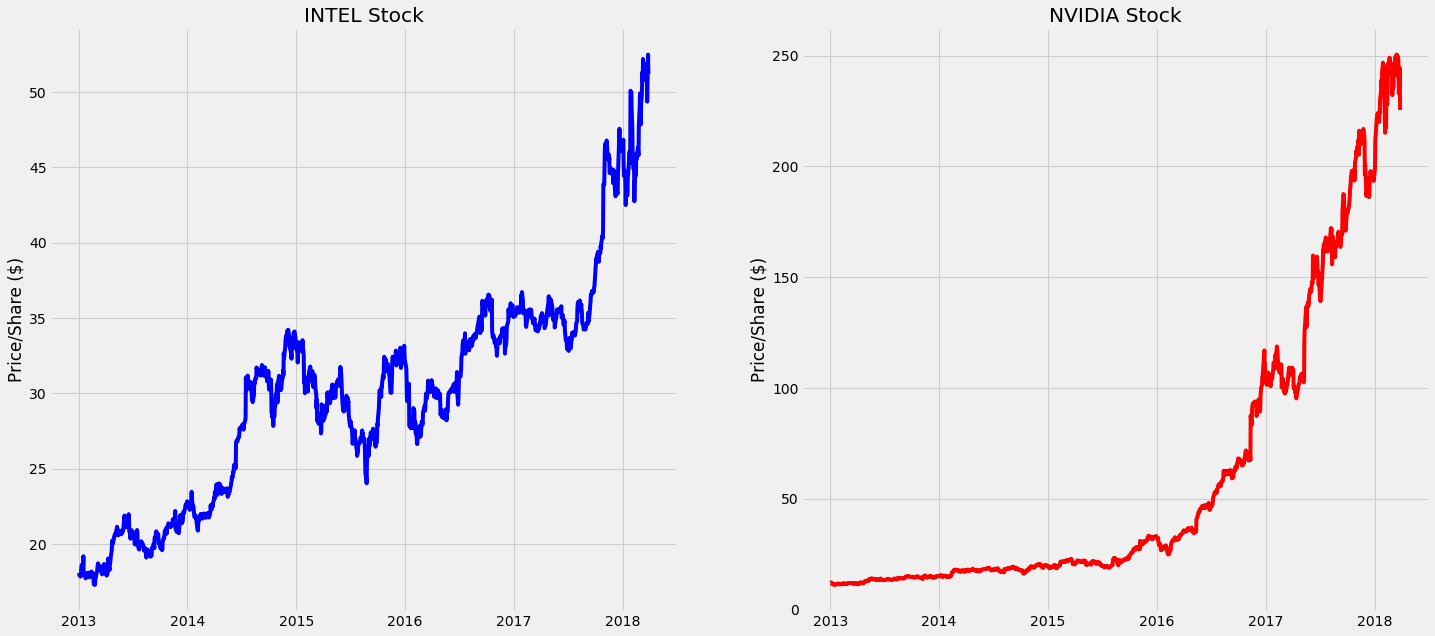

In [7]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(1,2,figsize=(22,10))

axes[0].plot(intc.index,intc['Adj. Close'],'b')
axes[0].set_title('INTEL Stock')
axes[0].set_ylabel('Price/Share ($)')

axes[1].plot(nvda.index,nvda['Adj. Close'],'r')
axes[1].set_title('NVIDIA Stock')
axes[1].set_ylabel('Price/Share ($)')

In [8]:
intc_shares = {2013:5.1e9, 2014:5.1e9, 2015:4.9e9,2016:4.88e9, 2017:4.84e9, 2018:4.75e9,}
nvda_shares = {2013:.63e9, 2014:.60e9, 2015:.56e9,2016:.57e9, 2017:.65e9, 2018:.63e9}
intc['Share_num'] = intc.index.year
nvda['Share_num'] = nvda.index.year
intc['Share_num'].replace(to_replace=intc_shares,inplace=True)
nvda['Share_num'].replace(to_replace=nvda_shares,inplace=True)

In [9]:
intc['Cap'] = intc['Share_num'] * intc['Adj. Close']
nvda['Cap'] = nvda['Share_num'] * nvda['Adj. Close']

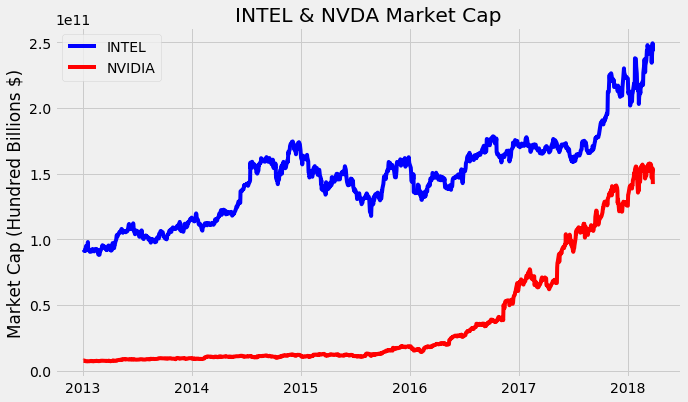

In [10]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(intc.index,intc['Cap'],'b',label = 'INTEL')
axes.plot(nvda.index,nvda['Cap'],'r',label = 'NVIDIA')
axes.set_title('INTEL & NVDA Market Cap')
axes.set_ylabel('Market Cap (Hundred Billions $)')
axes.legend()

In [11]:
import fbprophet as prophet

intc.reset_index(level=0,inplace=True)
nvda.reset_index(level=0,inplace=True)
intc = intc.rename(columns={'Date': 'ds', 'Cap': 'y'})
nvda = nvda.rename(columns={'Date': 'ds', 'Cap': 'y'})

In [12]:
intc.head()

,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Share_num,y
0,2013-01-02,21.15,21.38,21.05,21.38,47623000.0,0.0,1.0,17.906630,18.101359,17.821965,18.101359,47623000.0,5.100000e+09,9.231693e+10
1,2013-01-03,21.40,21.48,21.14,21.32,41054100.0,0.0,1.0,18.118292,18.186024,17.898163,18.050560,41054100.0,5.100000e+09,9.205786e+10
2,2013-01-04,21.36,21.39,21.05,21.16,30142500.0,0.0,1.0,18.084426,18.109825,17.821965,17.915096,30142500.0,5.100000e+09,9.136699e+10
3,2013-01-07,21.28,21.45,21.18,21.25,36352100.0,0.0,1.0,18.016694,18.160624,17.932029,17.991295,36352100.0,5.100000e+09,9.175560e+10
4,2013-01-08,21.23,21.56,21.02,21.09,48672000.0,0.0,1.0,17.974362,18.253756,17.796565,17.855831,48672000.0,5.100000e+09,9.106474e+10


In [13]:
intc['y'] = intc['y']/1e9
nvda['y'] = nvda['y']/1e9

In [14]:
intc_prophet = prophet.Prophet(changepoint_prior_scale=.15,daily_seasonality=True)
nvda_prophet = prophet.Prophet(changepoint_prior_scale=.15,daily_seasonality=True)
intc_prophet.fit(intc)
nvda_prophet.fit(nvda)

C:\Users\Justin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
intc_forecast = intc_prophet.make_future_dataframe(periods=365*2, freq='D')
nvda_forecast = nvda_prophet.make_future_dataframe(periods=365*2, freq='D')

In [16]:
intc_forecast = intc_prophet.predict(intc_forecast)
nvda_forecast = nvda_prophet.predict(nvda_forecast)

(0, 400)

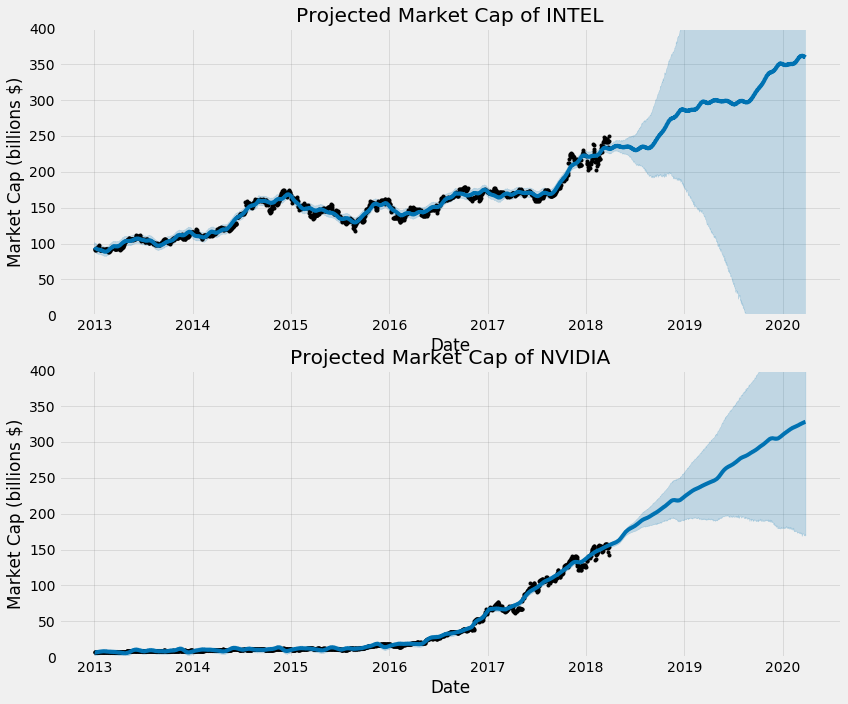

In [17]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(2,1,figsize=(12,10))

intc_prophet.plot(intc_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)',ax=axes[0]);
axes[0].set_title('Projected Market Cap of INTEL')
axes[0].set_ylim([0,400])

nvda_prophet.plot(nvda_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)',ax=axes[1]);
axes[1].set_title('Projected Market Cap of NVIDIA')
axes[1].set_ylim([0,400])


In [18]:
#Let's check the changepoints
intc_prophet.changepoints

42     2013-03-05
84     2013-05-03
126    2013-07-03
168    2013-09-03
210    2013-10-31
252    2014-01-02
294    2014-03-05
336    2014-05-05
378    2014-07-03
420    2014-09-03
462    2014-10-31
504    2015-01-02
547    2015-03-06
589    2015-05-06
631    2015-07-07
673    2015-09-03
715    2015-11-03
757    2016-01-05
799    2016-03-07
841    2016-05-05
883    2016-07-06
925    2016-09-02
967    2016-11-02
1009   2017-01-04
1051   2017-03-07
Name: ds, dtype: datetime64[ns]

In [19]:
nvda_prophet.changepoints[:10]

42    2013-03-05
84    2013-05-03
126   2013-07-03
168   2013-09-03
210   2013-10-31
252   2014-01-02
295   2014-03-06
337   2014-05-06
379   2014-07-07
421   2014-09-04
Name: ds, dtype: datetime64[ns]

In [20]:
intc_changepoints = [str(date) for date in intc_prophet.changepoints]
nvda_changepoints = [str(date) for date in nvda_prophet.changepoints]

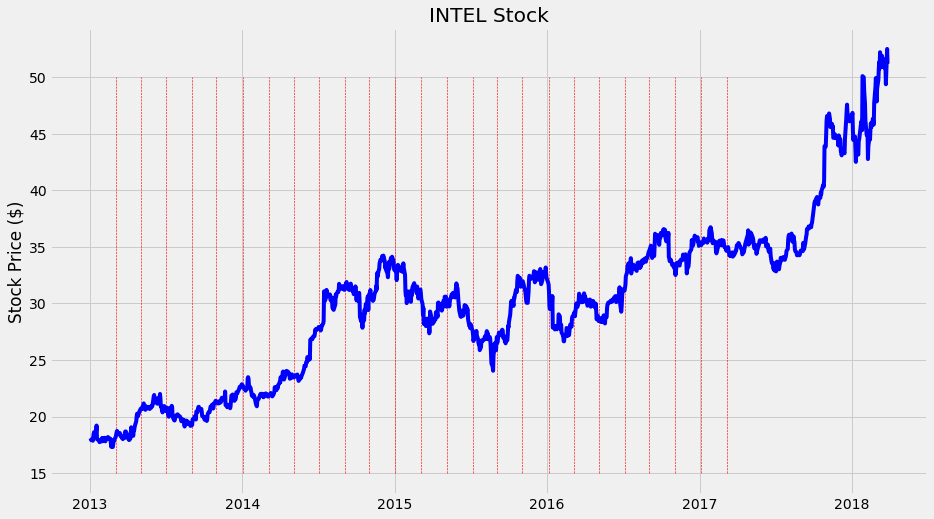

In [21]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(1,1,figsize=(14,8))

axes.plot(intc['ds'],intc['Adj. Close'],'b',label = 'INTEL')
axes.set_title('INTEL Stock')
axes.set_ylabel('Stock Price ($)')
axes.vlines(intc_changepoints,15,50,color = 'r',linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')

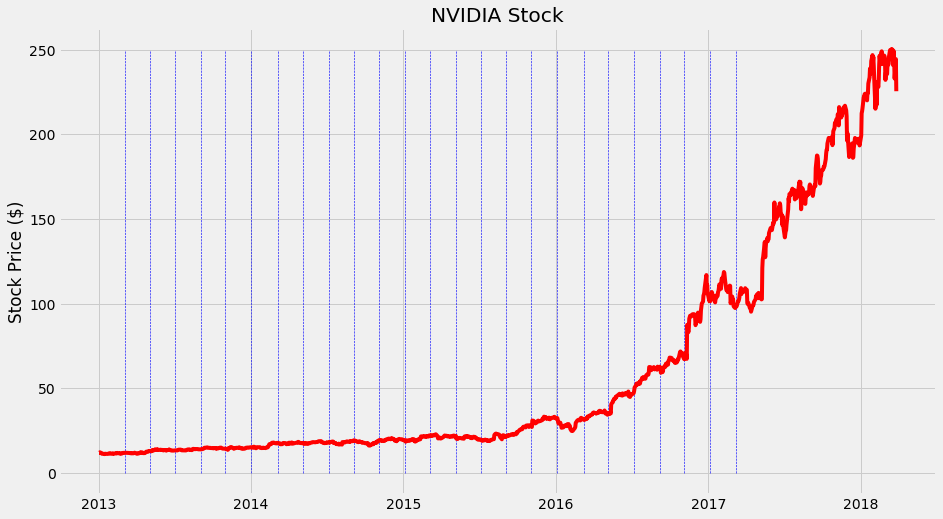

In [22]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(1,1,figsize=(14,8))

axes.plot(nvda['ds'],nvda['Adj. Close'],'r',label = 'NVIDIA')
axes.set_title('NVIDIA Stock')
axes.set_ylabel('Stock Price ($)')
axes.vlines(nvda_changepoints,0,250,color = 'b',linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')

In [23]:
#Let's now merge the datasets
nvda_names = ['nvda_%s' % column for column in nvda_forecast.columns]
intc_names = ['intc_%s' % column for column in intc_forecast.columns]

merge_intc = intc_forecast.copy()
merge_nvda = nvda_forecast.copy()

merge_intc.columns = intc_names
merge_nvda.columns = nvda_names

forecast = pd.merge(merge_intc,merge_nvda,how='inner',left_on='intc_ds',right_on='nvda_ds')
forecast = forecast.rename(columns={'nvda_ds':'Date'}).drop('intc_ds',axis=1)
forecast.head()

,intc_trend,intc_trend_lower,intc_trend_upper,intc_yhat_lower,intc_yhat_upper,intc_additive_terms,intc_additive_terms_lower,intc_additive_terms_upper,intc_daily,intc_daily_lower,...,nvda_multiplicative_terms,nvda_multiplicative_terms_lower,nvda_multiplicative_terms_upper,nvda_weekly,nvda_weekly_lower,nvda_weekly_upper,nvda_yearly,nvda_yearly_lower,nvda_yearly_upper,nvda_yhat
0,86.388819,86.388819,86.388819,88.177193,101.395950,8.451315,8.451315,8.451315,-2.756976,-2.756976,...,0.0,0.0,0.0,0.053224,0.053224,0.053224,-1.354760,-1.354760,-1.354760,6.521598
1,86.382345,86.382345,86.382345,87.719828,100.392772,7.843728,7.843728,7.843728,-2.756976,-2.756976,...,0.0,0.0,0.0,-0.094402,-0.094402,-0.094402,-1.291343,-1.291343,-1.291343,6.463373
2,86.375871,86.375871,86.375871,87.284789,100.672597,7.577767,7.577767,7.577767,-2.756976,-2.756976,...,0.0,0.0,0.0,0.045992,0.045992,0.045992,-1.232997,-1.232997,-1.232997,6.688098
3,86.356450,86.356450,86.356450,87.440753,99.456689,6.764481,6.764481,6.764481,-2.756976,-2.756976,...,0.0,0.0,0.0,0.083980,0.083980,0.083980,-1.086516,-1.086516,-1.086516,6.950520
4,86.349976,86.349976,86.349976,87.019085,100.030869,6.686416,6.686416,6.686416,-2.756976,-2.756976,...,0.0,0.0,0.0,0.013373,0.013373,0.013373,-1.045845,-1.045845,-1.045845,6.946568


In [24]:
forecast['Date']

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-07
4      2013-01-08
5      2013-01-09
6      2013-01-10
7      2013-01-11
8      2013-01-14
9      2013-01-15
10     2013-01-16
11     2013-01-17
12     2013-01-18
13     2013-01-22
14     2013-01-23
15     2013-01-24
16     2013-01-25
17     2013-01-28
18     2013-01-29
19     2013-01-30
20     2013-01-31
21     2013-02-01
22     2013-02-04
23     2013-02-05
24     2013-02-06
25     2013-02-07
26     2013-02-08
27     2013-02-11
28     2013-02-12
29     2013-02-13
          ...    
2016   2020-02-26
2017   2020-02-27
2018   2020-02-28
2019   2020-02-29
2020   2020-03-01
2021   2020-03-02
2022   2020-03-03
2023   2020-03-04
2024   2020-03-05
2025   2020-03-06
2026   2020-03-07
2027   2020-03-08
2028   2020-03-09
2029   2020-03-10
2030   2020-03-11
2031   2020-03-12
2032   2020-03-13
2033   2020-03-14
2034   2020-03-15
2035   2020-03-16
2036   2020-03-17
2037   2020-03-18
2038   2020-03-19
2039   2020-03-20
2040   202

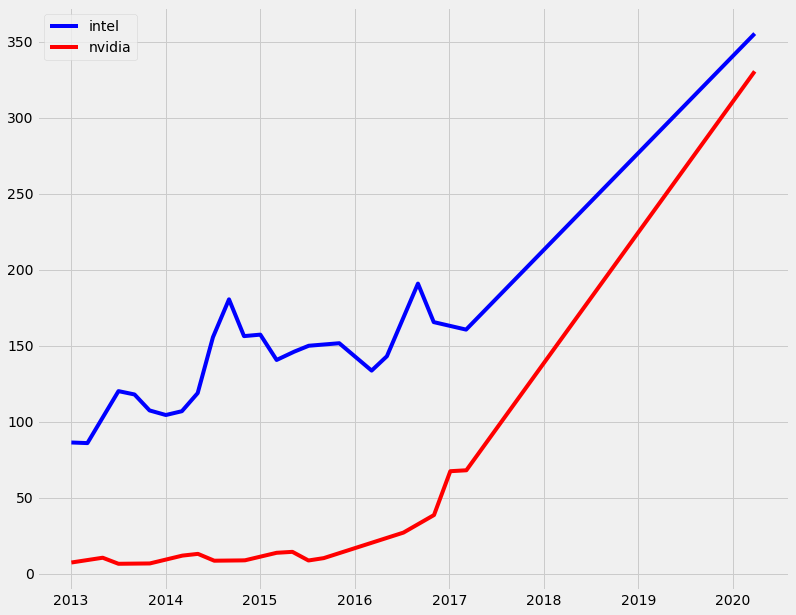

In [25]:
fig,axes = plt.subplots(1,1,figsize=(12,10))

axes.plot(forecast['Date'],forecast['intc_trend'],'b',label='intel')
axes.plot(forecast['Date'],forecast['nvda_trend'],'r',label='nvidia')
axes.legend()

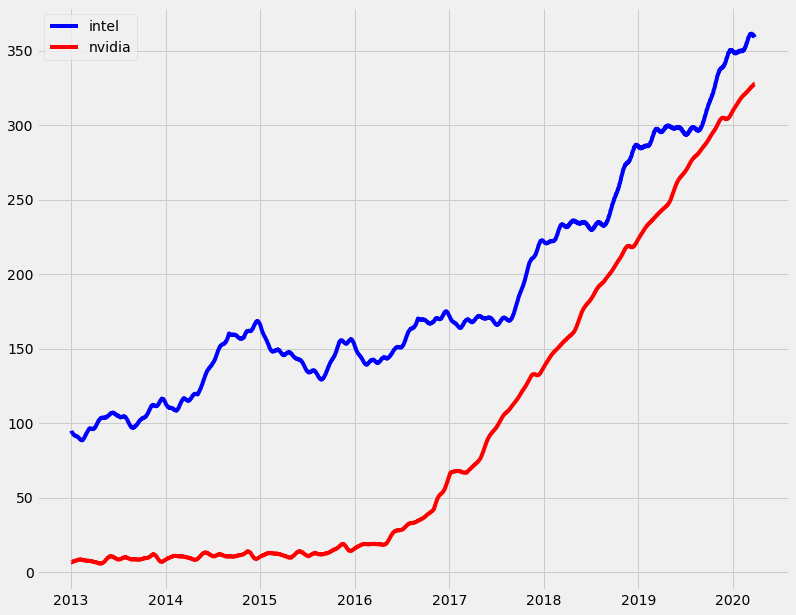

In [26]:
fig,axes = plt.subplots(1,1,figsize=(12,10))

axes.plot(forecast['Date'],forecast['intc_yhat'],'b',label='intel')
axes.plot(forecast['Date'],forecast['nvda_yhat'],'r',label='nvidia')
axes.legend()

In [27]:
differences_yhat = forecast['intc_yhat']-forecast['nvda_yhat']
estimate_closest = forecast.where(forecast['intc_yhat']-forecast['nvda_yhat'] == min(differences_yhat)).dropna()
date = pd.to_datetime(estimate_closest['Date'].values)

print('Nvidia comes closest to surpassing Intel on %s' % str(date[0].date()))

Nvidia comes closest to surpassing Intel on 2019-08-30


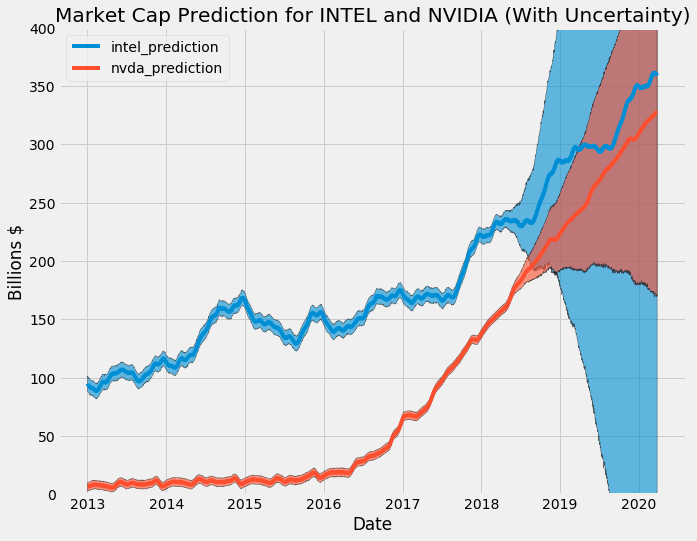

In [28]:
fig,axes = plt.subplots(1,1,figsize=(10,8))

axes.plot(forecast['Date'],forecast['intc_yhat'],label='intel_prediction')
axes.fill_between(forecast['Date'].dt.to_pydatetime(),forecast['intc_yhat_upper'], forecast['intc_yhat_lower'], alpha=0.6, edgecolor = 'k');
axes.plot(forecast['Date'],forecast['nvda_yhat'],label='nvda_prediction')
axes.fill_between(forecast['Date'].dt.to_pydatetime(),forecast['nvda_yhat_upper'], forecast['nvda_yhat_lower'], alpha=0.6, edgecolor = 'k')
axes.set_title('Market Cap Prediction for INTEL and NVIDIA (With Uncertainty)');
axes.set_ylabel('Billions $');
axes.set_xlabel('Date');
axes.set_ylim([0,400])
axes.legend()

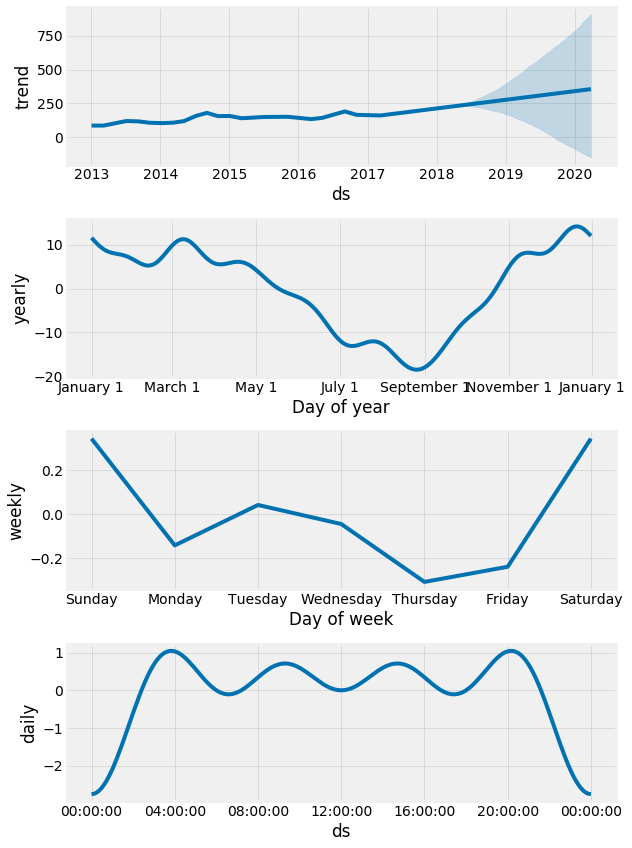

In [29]:
intc_prophet.plot_components(intc_forecast);

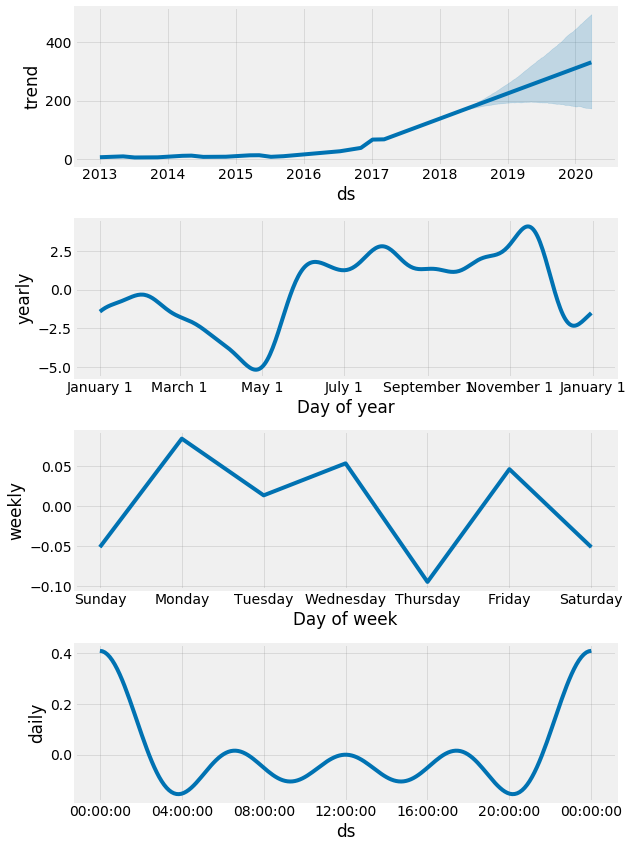

In [30]:
nvda_prophet.plot_components(nvda_forecast);